<a href="https://colab.research.google.com/github/simonemallei/complex-systems-social-graph/blob/main/recommender_social_graph/content/notebook/Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning the repository used in the notebook:

In [1]:
!git clone https://github.com/simonemallei/complex-systems-social-graph.git

Cloning into 'complex-systems-social-graph'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 99 (delta 32), reused 49 (delta 14), pack-reused 0
Unpacking objects: 100% (99/99), done.


Printing the files' names in its "recommender_social_graph" directory:

In [2]:
!ls

complex-systems-social-graph  sample_data


In [3]:
%cd complex-systems-social-graph/recommender_social_graph/

/content/complex-systems-social-graph/recommender_social_graph


In [4]:
!ls

abeba_methods.py  beba_tests  graph_creation.py  metrics.py	    people
beba_methods.py   content     __init__.py	 multi_dimensional


Importing mandatory methods for the notebook:

In [5]:
import networkx as nx
import random
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
from graph_creation import create_graph
from abeba_methods import apply_initial_feed, simulate_epoch_updated, compute_activation
from metrics import polarisation
from content.content_recommender import simulate_epoch_content_recommender

Creation and print of a graph:

Starting graph: 
  node label    opinion value
------------  ---------------
           0             0.84
           1            -0.48
           2            -0.36
           3             0.34
           4             0.08
           5            -0.94
           6            -0.16
           7            -0.22
           8            -0.12
           9             0.22
          10            -0.18
          11            -0.78
          12            -0.06
          13             0.44
          14             0.72
          15             0.6
          16            -0.68
          17            -0.3
          18            -0.38
          19            -0.9
          20            -0.58
          21            -0.96
          22             0.76
          23            -0.66
          24            -0.26
          25            -1
          26             0.48
          27             0.5
          28             0.32
          29             0.86
          30            -0.04


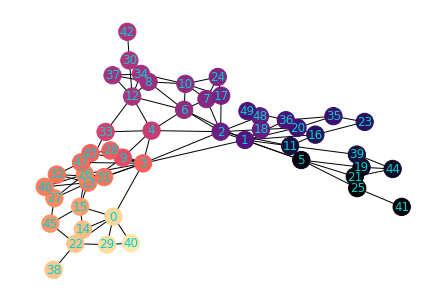

In [6]:
# create graph and update it with ABEBA model (with epsilon-error == 0.0)
G = create_graph(50, [1], avg_friend = 3, hp_alpha=5, hp_beta=0)
G = apply_initial_feed(G)
print("Starting graph: ")
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

Simulating an epoch with ABEBA model (with no Recommender):

  node label    opinion value
------------  ---------------
           0            0.84
           1           -0.45
           2           -0.36
           3            0.34
           4            0.08
           5           -0.929
           6           -0.16
           7           -0.22
           8           -0.12
           9            0.175
          10           -0.18
          11           -0.78
          12           -0.034
          13            0.444
          14            0.71
          15            0.588
          16           -0.68
          17           -0.3
          18           -0.397
          19           -0.885
          20           -0.601
          21           -0.944
          22            0.859
          23           -0.649
          24           -0.26
          25           -0.975
          26            0.48
          27            0.5
          28            0.393
          29            0.882
          30           -0.04
          31            0.42


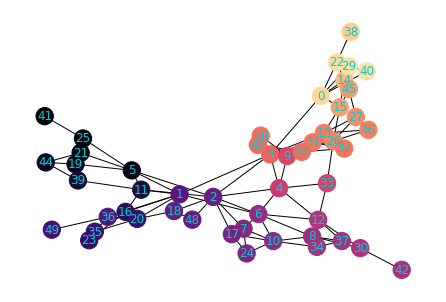

In [7]:
# Simulating an epoch and printing the opinion graph obtained
G = simulate_epoch_updated(G, 50, 50)
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

Creation and print of a graph:

Starting graph: 
  node label    opinion value
------------  ---------------
           0             0.56
           1             0.76
           2             0.34
           3            -0.32
           4             0.66
           5            -0.28
           6            -0.34
           7             0.22
           8             0
           9            -0.32
          10             0.12
          11            -0.24
          12            -0.72
          13             0.3
          14            -0.98
          15            -0.44
          16             0.1
          17             0.52
          18             0.78
          19             0.4
          20             0.6
          21            -0.44
          22             0.4
          23            -0.6
          24            -0.08
          25             0.24
          26            -0.72
          27            -0.86
          28             0.1
          29            -0.32
          30             0.72
   

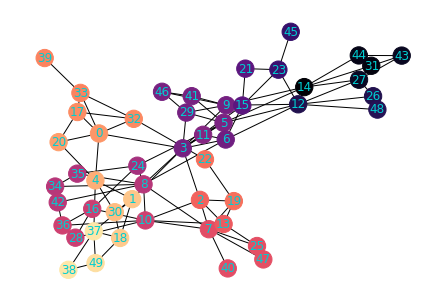

In [10]:
# create graph and update it with ABEBA model (with epsilon-error == 0.0)
G = create_graph(50, [1], avg_friend = 3, hp_alpha=5, hp_beta=0)
G = apply_initial_feed(G)
print("Starting graph: ")
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

Simulating 100 updates of 2 graphs:
- Previous graph with no recommender
- Previous graph with random content recommender

Then showing the two graphs' opinions and their polarisation value.

No Recommender Nodes:
  node label    opinion value
------------  ---------------
           0            0.315
           1            0.361
           2           -0.05
           3           -0.107
           4            0.355
           5           -0.192
           6           -0.189
           7           -0.05
           8           -0.119
           9           -0.211
          10           -0.078
          11           -0.183
          12           -0.26
          13           -0.048
          14           -0.32
          15           -0.187
          16           -0.112
          17            0.301
          18            0.405
          19            0.007
          20            0.363
          21           -0.234
          22            0.104
          23           -0.242
          24           -0.167
          25           -0.053
          26           -0.332
          27           -0.337
          28           -0.1
          29           -0.197
          30            

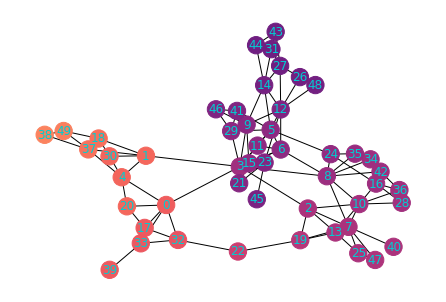

Random Recommender Nodes:
  node label    opinion value
------------  ---------------
           0           -0.099
           1           -0.362
           2            0.108
           3           -0.08
           4           -0.297
           5           -0.157
           6           -0.161
           7            0.181
           8           -0.057
           9           -0.258
          10            0.128
          11            0.081
          12           -0.159
          13            0.229
          14           -0.114
          15           -0.075
          16           -0.037
          17           -0.167
          18            0.118
          19           -0.133
          20           -0.124
          21           -0.187
          22           -0.296
          23           -0.125
          24           -0.031
          25            0.269
          26           -0.136
          27           -0.314
          28           -0.238
          29           -0.169
          30   

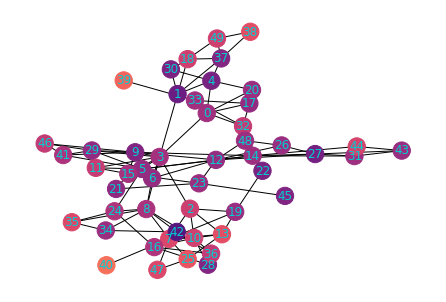

Nudge Recommender Nodes:
  node label    opinion value
------------  ---------------
           0            0.009
           1            0.002
           2            0.02
           3           -0.008
           4            0.015
           5           -0.035
           6            0.017
           7           -0.013
           8            0.015
           9           -0.002
          10           -0.005
          11            0.028
          12           -0.024
          13           -0.051
          14            0.008
          15           -0.007
          16            0.021
          17           -0.02
          18           -0.022
          19            0.091
          20            0.036
          21           -0.038
          22           -0.009
          23            0.012
          24            0.062
          25           -0.062
          26            0.022
          27            0.003
          28           -0.008
          29           -0.047
          30     

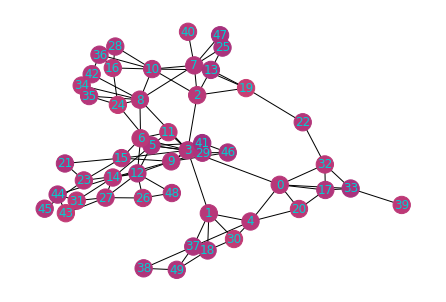

Similar Recommender Nodes:
  node label    opinion value
------------  ---------------
           0            0.655
           1            0.698
           2           -0.142
           3           -0.323
           4            0.689
           5           -0.319
           6           -0.303
           7           -0.095
           8           -0.167
           9           -0.346
          10           -0.128
          11           -0.319
          12           -0.37
          13           -0.089
          14           -0.367
          15           -0.329
          16           -0.131
          17            0.642
          18            0.699
          19           -0.093
          20            0.668
          21           -0.375
          22            0.619
          23           -0.375
          24           -0.211
          25           -0.075
          26           -0.387
          27           -0.387
          28           -0.129
          29           -0.33
          30   

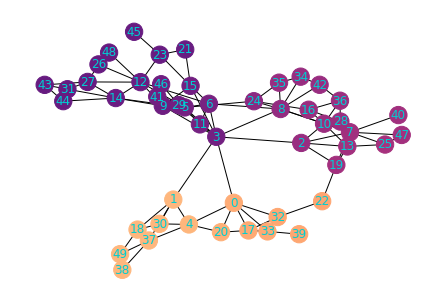

Polarisation (no recommender): 3.2382031553541384
Polarisation (content recommender): 1.8117577003633314
Polarisation (nudge recommender): 0.06959735403598316
Polarisation (similar recommender): 9.10236968870966


In [11]:
# Simulating an epoch and printing the opinion graph obtained
random_G = G.copy()
nudge_G = G.copy()
similar_G = G.copy()
for i in range(100):
  G = simulate_epoch_updated(G, 50, 50)
  random_G = simulate_epoch_content_recommender(random_G, 50, 50)
  nudge_G = simulate_epoch_content_recommender(nudge_G, 50, 50, strategy="nudge")
  similar_G = simulate_epoch_content_recommender(similar_G, 50, 50, strategy="similar")

# Showing graph with no recommender and its nodes' opinions
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
print("No Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("No Recommender Graph:")
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with random content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(random_G, 'opinion').values())
labels =  nx.get_node_attributes(random_G, 'opinion')
print("Random Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Random Recommender Graph:")
nx.draw(random_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with nudge content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(nudge_G, 'opinion').values())
labels =  nx.get_node_attributes(nudge_G, 'opinion')
print("Nudge Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Nudge Recommender Graph:")
nx.draw(nudge_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with similar content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(similar_G, 'opinion').values())
labels =  nx.get_node_attributes(similar_G, 'opinion')
print("Similar Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Similar Recommender Graph:")
nx.draw(similar_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

print(f"Polarisation (no recommender): {polarisation(G)}")
print(f"Polarisation (content recommender): {polarisation(random_G)}")
print(f"Polarisation (nudge recommender): {polarisation(nudge_G)}")
print(f"Polarisation (similar recommender): {polarisation(similar_G)}")